<a href="https://colab.research.google.com/github/CaioPassos3/EstatisticaAplicada/blob/main/EstatisticaAplicada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:
df_test = pd.read_csv('orders_combined_with_payments.csv', encoding='cp860')

In [12]:
df_test

,fulfilled,expiration_date,date_closed,id,manufacturing_ending_date,order_items,date_last_updated,last_updated,pack_id,coupon,...,payments_payment_method_id,payments_transaction_amount_refunded,payments_status_detail,payments_issuer_id,payments_id,payments_coupon_id,payments_shipping_cost,payments_status,payments_installment_amount,payments_coupon_amount
0,True,2023-05-03T09:00:46.000-04:00,2023-04-05T09:00:46.000-04:00,2000005412505352,NaN,"[{'item': {'id': 1, 'title': 'Bulbasaur', 'cat...",2023-04-16T20:41:36+00:00,2023-04-16T16:41:16.000-04:00,2.000004e+15,"{'amount': 0, 'id': None}",...,account_money,0.0,accredited,2007.0,56510061103,NaN,0.00,approved,NaN,0.0
1,True,2023-05-03T10:17:15.000-04:00,2023-04-05T10:17:15.000-04:00,2000005412951620,NaN,"[{'item': {'id': 2, 'title': 'Ivysaur', 'categ...",2023-04-20T13:27:46+00:00,2023-04-20T09:27:46.000-04:00,NaN,"{'amount': 0, 'id': None}",...,master,0.0,accredited,24.0,56550020366,NaN,32.55,approved,165.07,0.0
2,True,2023-05-03T11:34:58.000-04:00,2023-04-05T11:34:58.000-04:00,2000005413436720,NaN,"[{'item': {'id': 3, 'title': 'Venusaur', 'cate...",2023-04-15T13:37:30+00:00,2023-04-15T09:37:29.000-04:00,NaN,"{'amount': 0, 'id': None}",...,pix,0.0,accredited,12501.0,56517410157,NaN,0.00,approved,NaN,0.0
3,True,2023-05-03T11:35:25.000-04:00,2023-04-05T11:35:25.000-04:00,2000005413437704,NaN,"[{'item': {'id': 4, 'title': 'Charmander', 'ca...",2023-04-14T18:17:40+00:00,2023-04-14T14:17:38.000-04:00,NaN,"{'amount': 0, 'id': None}",...,master,0.0,accredited,12518.0,56517423891,NaN,0.00,approved,34.95,0.0
4,True,2023-05-03T11:44:03.000-04:00,2023-04-05T11:44:03.000-04:00,2000005413508456,NaN,"[{'item': {'id': 5, 'title': 'Charmeleon', 'ca...",2023-04-14T12:42:38+00:00,2023-04-14T08:42:22.000-04:00,NaN,"{'amount': 0, 'id': None}",...,visa,0.0,accredited,25.0,56517881165,NaN,0.00,approved,93.67,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024,NaN,2024-05-02T11:11:31.000-04:00,2024-04-04T11:11:31.000-04:00,2000007966102842,NaN,"[{'item': {'id': 253, 'title': 'Grovyle', 'cat...",2024-04-04T18:02:25+00:00,2024-04-04T11:13:09.000-04:00,NaN,"{'amount': 0, 'id': None}",...,visa,0.0,accredited,25.0,75583257760,NaN,0.00,approved,189.25,0.0
6025,NaN,2024-05-02T12:25:35.000-04:00,2024-04-04T12:25:35.000-04:00,2000007966699012,NaN,"[{'item': {'id': 942, 'title': 'Maschiff', 'ca...",2024-04-04T18:32:17+00:00,2024-04-04T12:27:45.000-04:00,NaN,"{'amount': 0, 'id': None}",...,pix,0.0,accredited,12501.0,75589150288,NaN,0.00,approved,NaN,0.0
6026,NaN,2024-05-02T12:51:27.000-04:00,2024-04-04T12:51:27.000-04:00,2000007966924882,NaN,"[{'item': {'id': 762, 'title': 'Steenee', 'cat...",2024-04-04T18:59:21+00:00,2024-04-04T12:53:07.000-04:00,NaN,"{'amount': 0, 'id': None}",...,master,0.0,accredited,12518.0,75590859926,NaN,0.00,approved,95.92,0.0
6027,NaN,2024-05-02T14:43:36.000-04:00,2024-04-04T14:43:36.000-04:00,2000007967861358,NaN,"[{'item': {'id': 831, 'title': 'Wooloo', 'cate...",2024-04-04T20:29:22+00:00,2024-04-04T14:45:19.000-04:00,NaN,"{'amount': 0, 'id': None}",...,master,0.0,accredited,12749.0,75597803504,NaN,0.00,approved,58.69,0.0


In [11]:
df = df_test[['payments_payment_method_id', 'payments_installment_amount', 'payments_installments']]
df
#payments_payment_method_id: método de pagamento
#payments_installment_amount: valor da parcela(nos NaN, foi so uma parcela)
#payments_installments: quantidade de parcelas

,payments_payment_method_id,payments_installment_amount,payments_installments
0,account_money,NaN,1
1,master,165.07,1
2,pix,NaN,1
3,master,34.95,10
4,visa,93.67,2
...,...,...,...
6024,visa,189.25,1
6025,pix,NaN,1
6026,master,95.92,1
6027,master,58.69,4


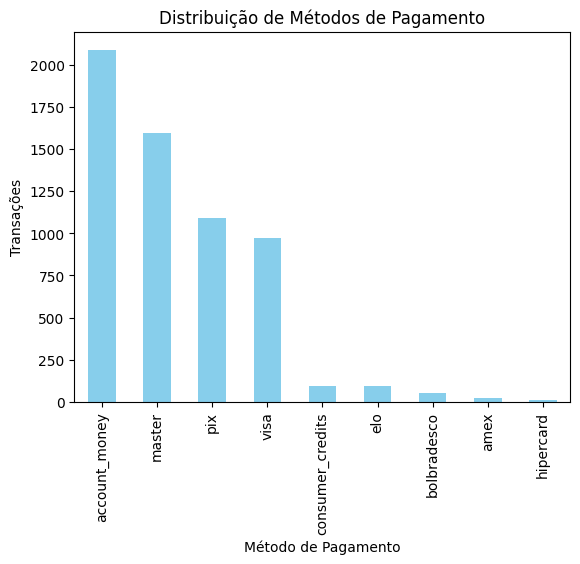

In [13]:
metodos_pagamento_counts = df['payments_payment_method_id'].value_counts()
metodos_pagamento_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Método de Pagamento')
plt.ylabel('Transações')
plt.title('Distribuição de Métodos de Pagamento')
plt.show()

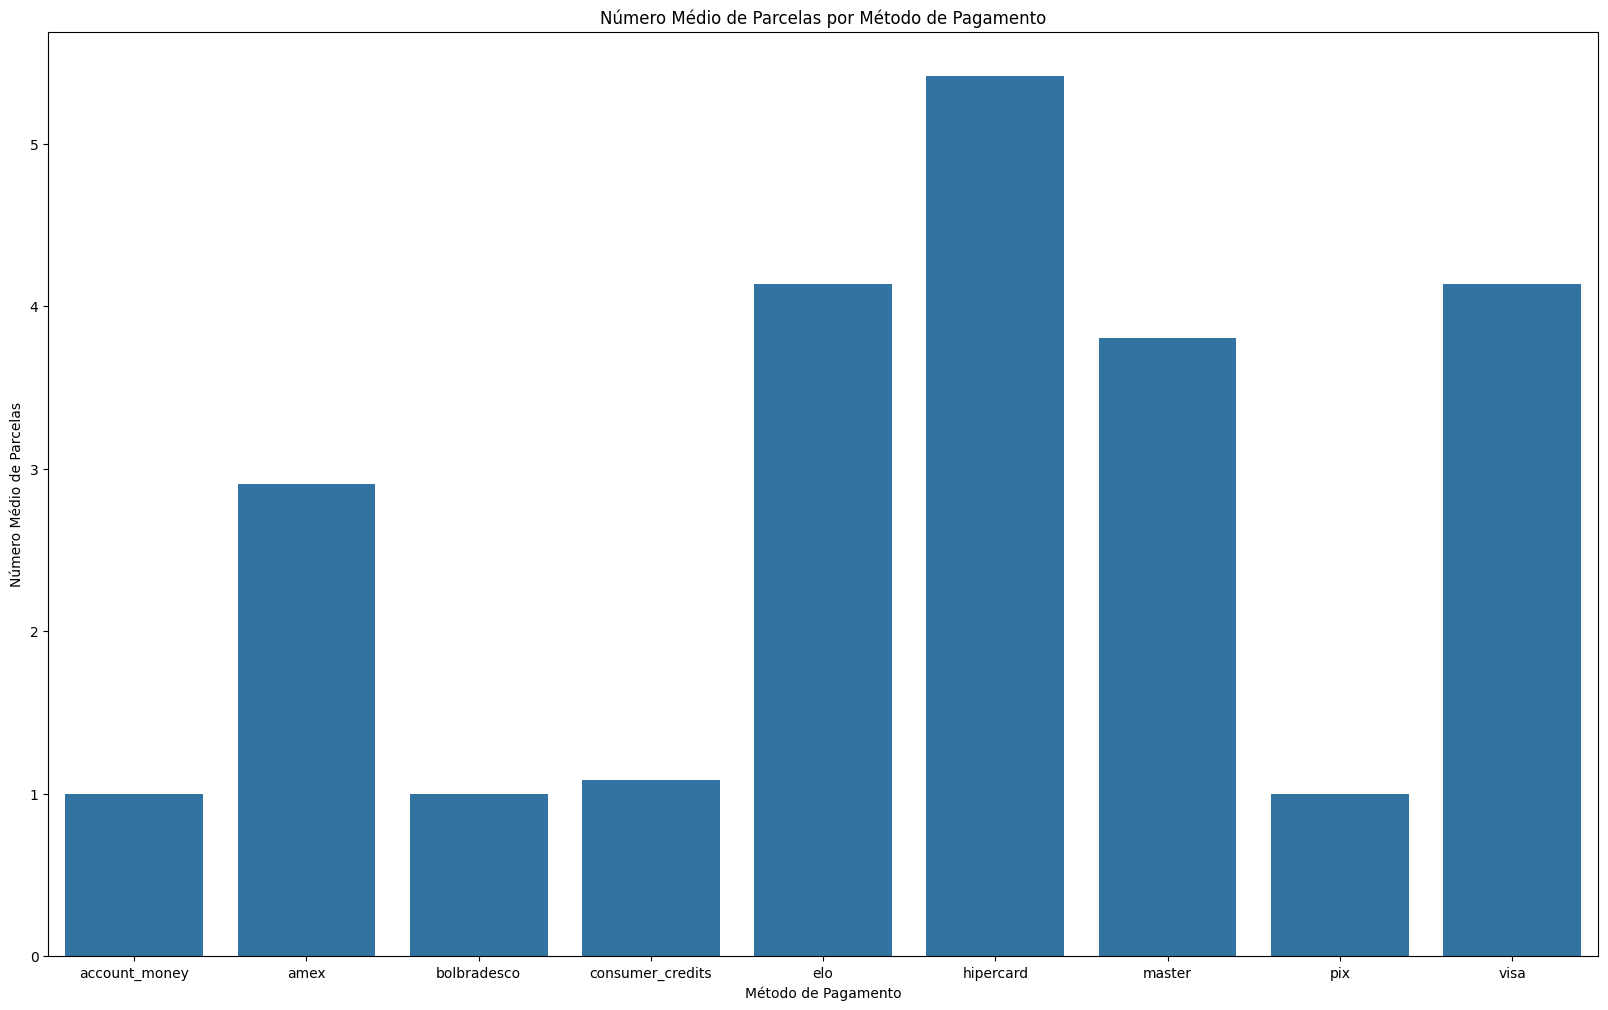

In [21]:
mean_installments_per_method = df.groupby('payments_payment_method_id')['payments_installments'].mean()

plt.figure(figsize=(20, 12))
sns.barplot(x=mean_installments_per_method.index, y=mean_installments_per_method.values)
plt.xlabel('Método de Pagamento')
plt.ylabel('Número Médio de Parcelas')
plt.title('Número Médio de Parcelas por Método de Pagamento')
plt.show()

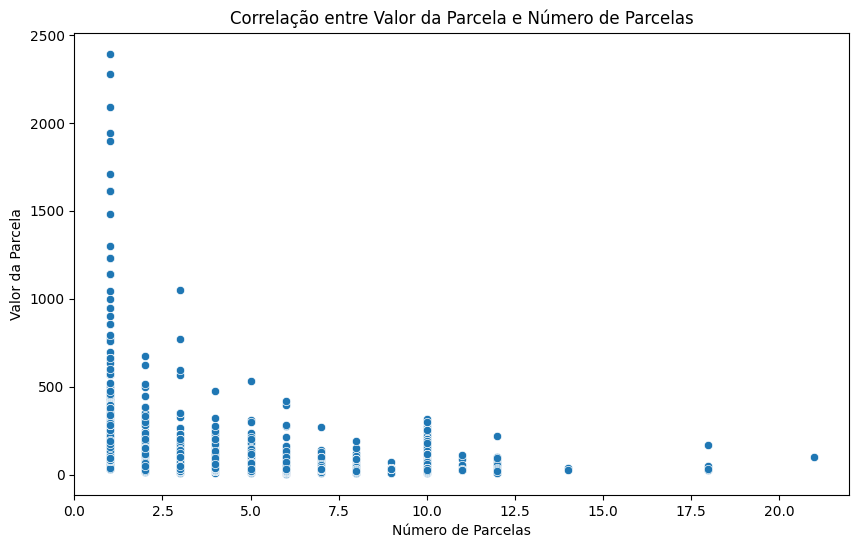

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='payments_installments', y='payments_installment_amount', data=df)
plt.xlabel('Número de Parcelas')
plt.ylabel('Valor da Parcela')
plt.title('Correlação entre Valor da Parcela e Número de Parcelas')
plt.show()

<ipython-input-11-a0e28dc95c21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_volume'] = df['payments_installment_amount'] * df['payments_installments']


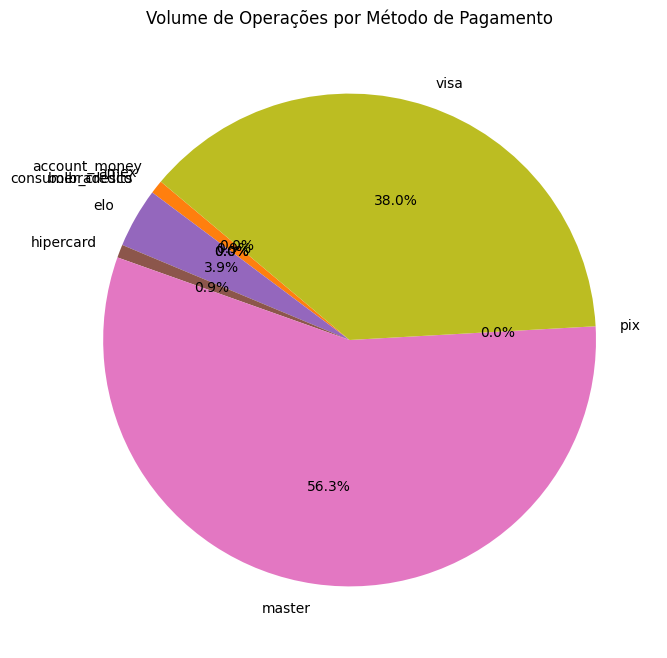

In [ ]:
df['total_volume'] = df['payments_installment_amount'] * df['payments_installments']
volume_por_metodo = df.groupby('payments_payment_method_id')['total_volume'].sum()

plt.figure(figsize=(8, 8))
plt.pie(volume_por_metodo, labels=volume_por_metodo.index, autopct='%1.1f%%', startangle=140)
plt.title('Volume de Operações por Método de Pagamento')
plt.show()

<ipython-input-12-1f045493b255>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['volume_vendas_reais'] = df['payments_installment_amount'] * df['payments_installments']


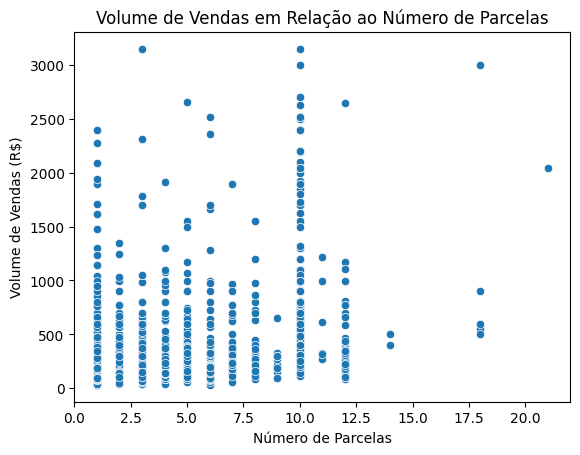

In [ ]:
df['volume_vendas_reais'] = df['payments_installment_amount'] * df['payments_installments']

sns.scatterplot(x='payments_installments', y='volume_vendas_reais', data=df)

plt.title('Volume de Vendas em Relação ao Número de Parcelas')
plt.xlabel('Número de Parcelas')
plt.ylabel('Volume de Vendas (R$)')

plt.show()